In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
df = pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
# As dummy variables are already given for month and day in data set, we can drop those features

df= df.drop(["month", "day"], axis=1)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [6]:
X = df.drop('size_category', axis = 1)
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
y = df.size_category
y.head()

0    small
1    small
2    small
3    small
4    small
Name: size_category, dtype: object

In [9]:
y.value_counts(normalize = True) 

small    0.731141
large    0.268859
Name: size_category, dtype: float64

##### The given data set is imbalance. We need to first make it balanced.

In [10]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [11]:
x_resampled, y_resampled = RandomOverSampler().fit_resample(X, y)

In [12]:
y.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [13]:
y_resampled.value_counts()

small    378
large    378
Name: size_category, dtype: int64

In [17]:
y_resampled.replace({'small': 0, 'large': 1}, inplace = True)

In [18]:
y_resampled.head()

0    0
1    0
2    0
3    0
4    0
Name: size_category, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [21]:
# Applying the feature scaling

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

## Applying the neural network

In [22]:
#Initialising ANN

classifier = Sequential()

# Adding the input layer and first hidden layer 

classifier.add(Dense(units=10, kernel_initializer= "he_uniform", activation= "relu", input_dim=28 ))
classifier.add(Dropout(0.2))

# Adding second hidden layer

classifier.add(Dense(units=15, kernel_initializer= "he_uniform", activation= "relu"))
classifier.add(Dropout(0.3))

classifier.add(Dense(units=10, kernel_initializer= "he_uniform", activation= "relu"))
classifier.add(Dropout(0.2))

# Adding the output layer

classifier.add(Dense(units=1, kernel_initializer= "glorot_uniform", activation= "sigmoid"))


# Compling the ANN
classifier.compile(optimizer= "adam", loss="binary_crossentropy", metrics= ["accuracy"])

In [23]:
# Fitting the ANN on training data set

model_history = classifier.fit(X_train, y_train, validation_split=0.3, batch_size=10, epochs=100)

Epoch 1/100
37/37 [==============================] - 2s 13ms/step - loss: 0.8391 - accuracy: 0.5297 - val_loss: 0.7307 - val_accuracy: 0.4717
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 0.8203 - accuracy: 0.4703 - val_loss: 0.7022 - val_accuracy: 0.4528
Epoch 3/100
37/37 [==============================] - 0s 5ms/step - loss: 0.8024 - accuracy: 0.4757 - val_loss: 0.6903 - val_accuracy: 0.5094
Epoch 4/100
37/37 [==============================] - 0s 5ms/step - loss: 0.7507 - accuracy: 0.5649 - val_loss: 0.6894 - val_accuracy: 0.5094
Epoch 5/100
37/37 [==============================] - 0s 5ms/step - loss: 0.7218 - accuracy: 0.5405 - val_loss: 0.6869 - val_accuracy: 0.5157
Epoch 6/100
37/37 [==============================] - 0s 5ms/step - loss: 0.7026 - accuracy: 0.5568 - val_loss: 0.6792 - val_accuracy: 0.5346
Epoch 7/100
37/37 [==============================] - 0s 4ms/step - loss: 0.7224 - accuracy: 0.5676 - val_loss: 0.6796 - val_accuracy: 0.4969
Epoch 8/100


Epoch 59/100
37/37 [==============================] - 0s 5ms/step - loss: 0.4687 - accuracy: 0.7568 - val_loss: 0.5135 - val_accuracy: 0.7421
Epoch 60/100
37/37 [==============================] - 0s 5ms/step - loss: 0.4692 - accuracy: 0.7730 - val_loss: 0.5083 - val_accuracy: 0.7484
Epoch 61/100
37/37 [==============================] - 0s 4ms/step - loss: 0.4678 - accuracy: 0.7541 - val_loss: 0.5036 - val_accuracy: 0.7421
Epoch 62/100
37/37 [==============================] - 0s 4ms/step - loss: 0.4833 - accuracy: 0.7568 - val_loss: 0.4992 - val_accuracy: 0.7610
Epoch 63/100
37/37 [==============================] - 0s 4ms/step - loss: 0.4322 - accuracy: 0.7919 - val_loss: 0.4989 - val_accuracy: 0.7547
Epoch 64/100
37/37 [==============================] - 0s 5ms/step - loss: 0.4393 - accuracy: 0.7892 - val_loss: 0.4943 - val_accuracy: 0.7673
Epoch 65/100
37/37 [==============================] - 0s 6ms/step - loss: 0.4517 - accuracy: 0.7595 - val_loss: 0.4904 - val_accuracy: 0.7610
Epoch 

In [24]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


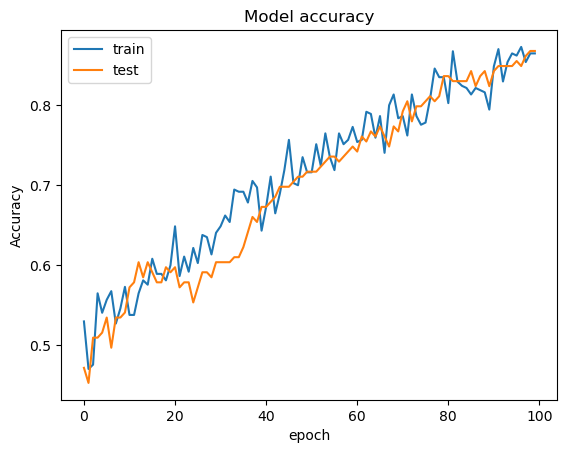

In [25]:
# summary of History for accuracy

plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

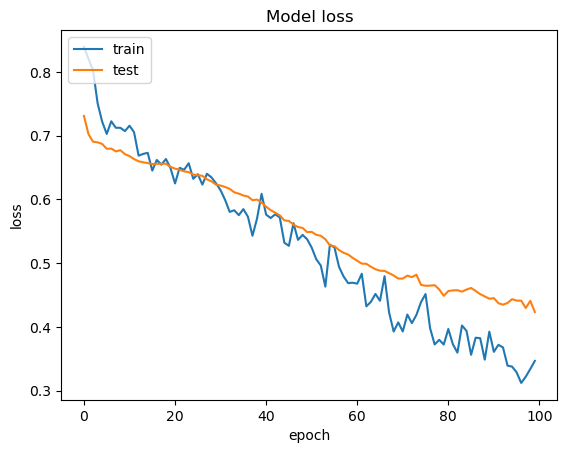

In [26]:
# summary of History for loss

plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [27]:
# Predicting the test 

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

8/8 [==============================] - 0s 2ms/step


In [30]:
confusion_matrix(y_test, y_pred)

array([[106,  15],
       [ 23,  83]], dtype=int64)

In [31]:
accuracy_score(y_test, y_pred)

0.8325991189427313

## Optimizing the parameters using keras tuner

In [34]:
pip install kerastuner

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement kerastuner (from versions: none)
ERROR: No matching distribution found for kerastuner


In [35]:
from keras_tuner import RandomSearch
from tensorflow.keras import layers

In [36]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    for i in range(hp.Int("num_layers", 2, 20)):
        model.add(
            layers.Dense(
                units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
                activation="relu",
            )
        )
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [37]:
tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [38]:
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Trial 3 Complete [00h 02m 05s]
val_accuracy: 0.8656387627124786

Best val_accuracy So Far: 0.9207048416137695
Total elapsed time: 00h 03m 59s
INFO:tensorflow:Oracle triggered exit


In [39]:
tuner.results_summary()

Results summary
Results in my_dir\helloworld
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 18
units_0: 64
units_1: 288
learning_rate: 0.001
units_2: 320
units_3: 64
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
units_17: 32
Score: 0.9207048416137695
Trial summary
Hyperparameters:
num_layers: 4
units_0: 480
units_1: 352
learning_rate: 0.0001
units_2: 32
units_3: 32
Score: 0.9052863419055939
Trial summary
Hyperparameters:
num_layers: 17
units_0: 160
units_1: 480
learning_rate: 0.0001
units_2: 192
units_3: 192
units_4: 128
units_5: 320
units_6: 352
units_7: 512
units_8: 224
units_9: 160
units_10: 480
units_11: 416
units_12: 32
units_13: 32
units_14: 352
units_15: 288
units_16: 32
units_17: 480
Score: 0.8656387627124786


In [40]:
#Initialising ANN
classifier1 = Sequential()

# Adding the input layer and first hidden layer 
classifier1.add(Dense(units=160, activation= "relu", input_dim=28 ))
classifier1.add(Dense(units=480,  activation= "relu"))
classifier1.add(Dense(units=480,  activation= "relu"))
classifier1.add(Dense(units=32,  activation= "relu"))
classifier1.add(Dense(units=32,  activation= "relu"))
classifier1.add(Dense(units=32,  activation= "relu"))
classifier1.add(Dense(units=32,  activation= "relu"))
classifier1.add(Dense(units=32,  activation= "relu"))
classifier1.add(Dense(units=32,  activation= "relu"))
#classifier1.add(Dense(units=32,  activation= "relu"))
#classifier1.add(Dense(units=32,  activation= "relu"))
#classifier1.add(Dense(units=32,  activation= "relu"))
#classifier1.add(Dense(units=32,  activation= "relu"))
#classifier1.add(Dense(units=32,  activation= "relu"))

# Adding the output layer
classifier1.add(Dense(units=1, activation= "sigmoid"))

# Compling the ANN
optimizer = keras.optimizers.Adam(learning_rate=0.001)
classifier1.compile(optimizer=optimizer, loss="binary_crossentropy", metrics= ["accuracy"])

In [41]:
model_history1= classifier1.fit(X_train, y_train, validation_split=0.3, batch_size=10, epochs=100)

Epoch 1/100
37/37 [==============================] - 3s 18ms/step - loss: 0.6925 - accuracy: 0.5108 - val_loss: 0.6899 - val_accuracy: 0.4969
Epoch 2/100
37/37 [==============================] - 0s 11ms/step - loss: 0.6644 - accuracy: 0.6135 - val_loss: 0.6658 - val_accuracy: 0.5660
Epoch 3/100
37/37 [==============================] - 0s 11ms/step - loss: 0.5389 - accuracy: 0.7514 - val_loss: 0.7471 - val_accuracy: 0.6604
Epoch 4/100
37/37 [==============================] - 0s 10ms/step - loss: 0.4913 - accuracy: 0.7784 - val_loss: 0.5562 - val_accuracy: 0.7421
Epoch 5/100
37/37 [==============================] - 0s 12ms/step - loss: 0.4570 - accuracy: 0.7865 - val_loss: 0.5273 - val_accuracy: 0.7736
Epoch 6/100
37/37 [==============================] - 0s 9ms/step - loss: 0.3437 - accuracy: 0.8541 - val_loss: 0.5147 - val_accuracy: 0.8239
Epoch 7/100
37/37 [==============================] - 0s 12ms/step - loss: 0.3027 - accuracy: 0.8892 - val_loss: 0.4745 - val_accuracy: 0.8553
Epoch 8

37/37 [==============================] - 0s 10ms/step - loss: 0.0476 - accuracy: 0.9865 - val_loss: 0.7658 - val_accuracy: 0.9182
Epoch 59/100
37/37 [==============================] - 0s 10ms/step - loss: 0.0602 - accuracy: 0.9838 - val_loss: 0.7985 - val_accuracy: 0.9057
Epoch 60/100
37/37 [==============================] - 0s 9ms/step - loss: 0.0226 - accuracy: 0.9919 - val_loss: 1.0796 - val_accuracy: 0.8994
Epoch 61/100
37/37 [==============================] - 0s 9ms/step - loss: 0.0387 - accuracy: 0.9892 - val_loss: 1.1062 - val_accuracy: 0.8679
Epoch 62/100
37/37 [==============================] - 0s 9ms/step - loss: 0.0389 - accuracy: 0.9892 - val_loss: 1.0945 - val_accuracy: 0.8679
Epoch 63/100
37/37 [==============================] - 0s 9ms/step - loss: 0.0100 - accuracy: 0.9973 - val_loss: 1.5238 - val_accuracy: 0.9057
Epoch 64/100
37/37 [==============================] - 0s 9ms/step - loss: 0.1258 - accuracy: 0.9568 - val_loss: 0.6840 - val_accuracy: 0.8365
Epoch 65/100
37/3

In [42]:
# Predicting the test 
y_pred1 = classifier1.predict(X_test)
y_pred1 = (y_pred1 >= 0.5)

8/8 [==============================] - 0s 4ms/step


In [43]:
accuracy_score(y_test, y_pred1)

0.8942731277533039

In [44]:
y_pred2 = classifier1.predict(X_train)
y_pred2 = (y_pred2 >= 0.5)

17/17 [==============================] - 0s 5ms/step


In [45]:
accuracy_score(y_train,y_pred2)

0.9735349716446124